In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [3]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")
submission = pd.read_csv("./sample_submission.csv")

In [7]:
print(f'train의 구조 {train_df.shape}')
print(f'test의 구조 {test_df.shape}')
print(f'submission의 구조 {submission.shape}')

train의 구조 (1350, 15)
test의 구조 (1350, 14)
submission의 구조 (1350, 2)


In [8]:
train_df.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
 14  target          1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


In [23]:
numeric_features = train_df.columns[(train_df.dtypes == "float64") | (train_df.dtypes == "int64")]
categorical_features = train_df.columns[(train_df.dtypes == "O")]

print("수치형 데이터는 다음과 같습니다. \n ", list(numeric_features))
print("범주형 데이터는 다음과 같습니다. \n ", list(categorical_features))

수치형 데이터는 다음과 같습니다. 
  ['id', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']
범주형 데이터는 다음과 같습니다. 
  ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


In [25]:
cols1=['id', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt',  'Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Full Bath', 'Garage Cars', 'target']
train_df = train_df[cols1]

cols2=['id', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt',  'Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Full Bath', 'Garage Cars']
test_df=test_df[cols2]
train_df.head(3)

,id,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Full Bath,Garage Cars,target
0,1,2003,2003,2003,10,Ex,Ex,Ex,2392,2392,2392,968,2,3,386250
1,2,2006,2007,2006,7,Gd,Ex,Gd,1352,1352,1352,466,2,2,194000
2,3,1967,1967,1967,5,TA,TA,TA,900,864,900,288,1,1,123000


In [31]:
# 이상치 제거

# 이상치를 다 low, high으로 채우는건 아니지않남? 

def cut_outlier(df2, columns):
    df = df2.copy()
    for column in columns:
        
        q1 = df[column].quantile(.25)
        q3 = df[column].quantile(.75)
        iqr = q3 - q1
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        
        df.loc[df[column] < low, column] = low
        df.loc[df[column] > high, column] = high
        
    return df

train_df_2 = cut_outlier(train_df, ['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area'])
test_df_2 = cut_outlier(test_df, ['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area'])
        

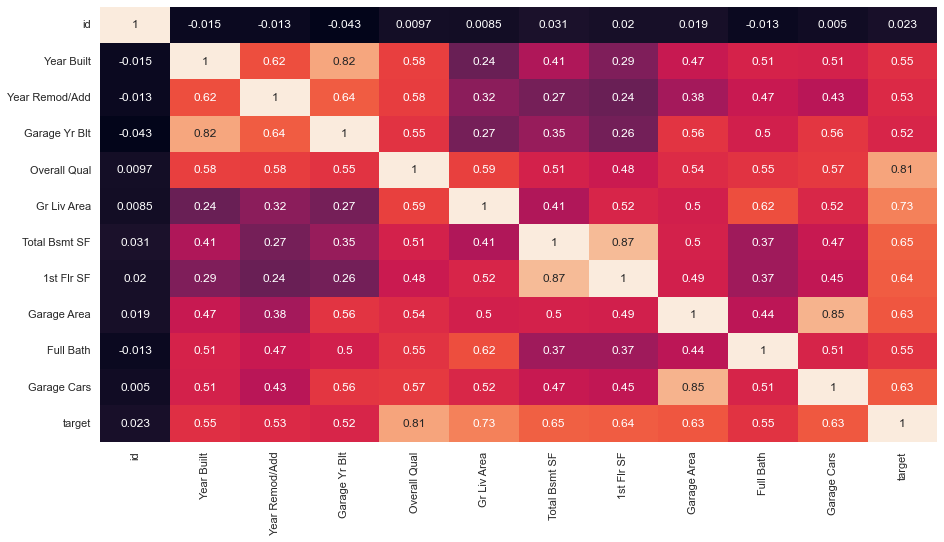

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

data_corr = train_df_2.corr()

# 히트맵


#plt.figure(figsize = (50,20))
#plt.subplots(1,1,figsize = (10,10))
#sns.set(font_scale = 0.8)
sns.set(rc = {"figure.figsize": (15,8)})
sns.heatmap(data_corr, annot = True, cbar = False)
plt.show()

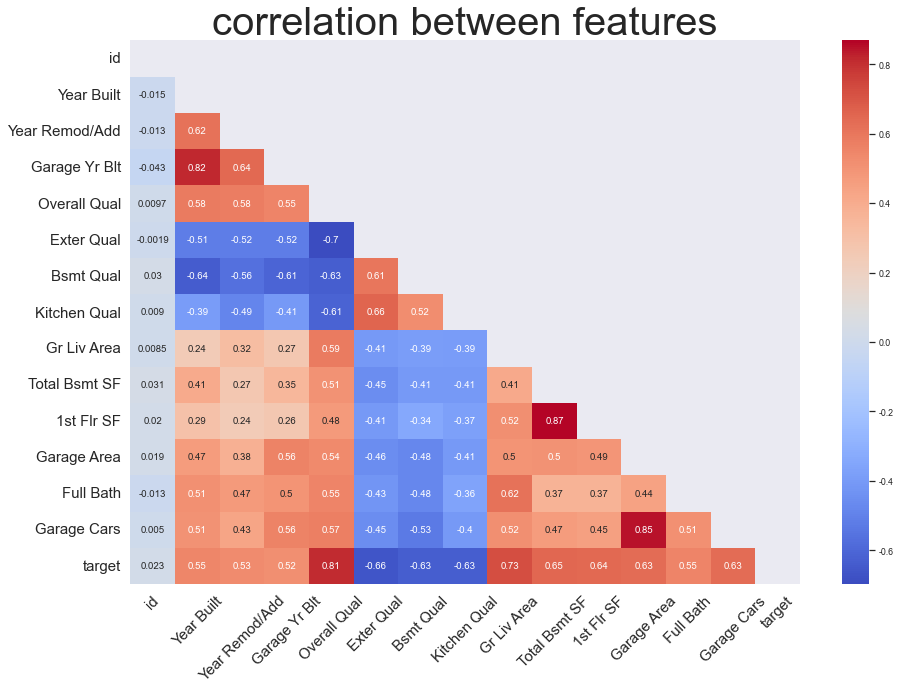

In [40]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = train_df_2.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [60]:
train_df_2.corr().loc[:"Garage Cars","target"].sort_values(ascending = False)

Overall Qual      0.810607
Gr Liv Area       0.726246
Total Bsmt SF     0.650725
1st Flr SF        0.642814
Garage Cars       0.634497
Garage Area       0.630777
Full Bath         0.554453
Year Built        0.546037
Year Remod/Add    0.529477
Garage Yr Blt     0.517973
id                0.022934
Name: target, dtype: float64

In [61]:
train_df_2.corr()

,id,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Full Bath,Garage Cars,target
id,1.000000,-0.014630,-0.012683,-0.043364,0.009727,0.008480,0.031231,0.020400,0.019492,-0.012976,0.005031,0.022934
Year Built,-0.014630,1.000000,0.616008,0.815615,0.582875,0.240999,0.408198,0.294812,0.467648,0.508745,0.505803,0.546037
Year Remod/Add,-0.012683,0.616008,1.000000,0.644251,0.579142,0.321695,0.267690,0.240856,0.383262,0.472537,0.433307,0.529477
Garage Yr Blt,-0.043364,0.815615,0.644251,1.000000,0.553927,0.267218,0.351229,0.264230,0.558352,0.498692,0.562320,0.517973
Overall Qual,0.009727,0.582875,0.579142,0.553927,1.000000,0.587594,0.505596,0.476823,0.535295,0.554248,0.571066,0.810607
Gr Liv Area,0.008480,0.240999,0.321695,0.267218,0.587594,1.000000,0.412159,0.515984,0.496317,0.615850,0.519952,0.726246
Total Bsmt SF,0.031231,0.408198,0.267690,0.351229,0.505596,0.412159,1.000000,0.869101,0.503879,0.371791,0.467802,0.650725
1st Flr SF,0.020400,0.294812,0.240856,0.264230,0.476823,0.515984,0.869101,1.000000,0.494904,0.372052,0.451059,0.642814
Garage Area,0.019492,0.467648,0.383262,0.558352,0.535295,0.496317,0.503879,0.494904,1.000000,0.441213,0.845321,0.630777
Full Bath,-0.012976,0.508745,0.472537,0.498692,0.554248,0.615850,0.371791,0.372052,0.441213,1.000000,0.513078,0.554453


In [62]:
train_df_2.head()

,id,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Full Bath,Garage Cars,target
0,1,2003,2003,2003,10,Ex,Ex,Ex,2392.0,2049.75,2161.875,918,2,3,386250
1,2,2006,2007,2006,7,Gd,Ex,Gd,1352.0,1352.00,1352.000,466,2,2,194000
2,3,1967,1967,1967,5,TA,TA,TA,900.0,864.00,900.000,288,1,1,123000
3,4,1900,2006,2000,5,TA,TA,Gd,1174.0,680.00,680.000,576,1,2,135000
4,5,2005,2005,2005,7,Gd,Gd,Gd,1958.0,1026.00,1026.000,918,2,3,250000


In [143]:
# 범주형 변수를 드랍... 아닐거같은데....
# 후에 원핫인코딩 해보기


train_df_3 = train_df_2.drop(['Exter Qual', 'Bsmt Qual', 'Kitchen Qual','id'], axis=1, inplace=False)
test_df_3= test_df_2.drop(['Exter Qual', 'Bsmt Qual', 'Kitchen Qual','id'], axis=1, inplace=False)

# 모델링

In [144]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression # 릿지, 라쏘, 선형회귀
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #랜덤포레스트회귀, GBM회귀
from sklearn.tree import DecisionTreeRegressor #의사결정회귀
from xgboost import XGBRegressor #XGB회귀
from lightgbm import LGBMRegressor #LGB회귀

from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import train_test_split

In [145]:
ridge = Ridge()
lasso = Lasso()
linear = LinearRegression()
rf_reg = RandomForestRegressor()
dt_reg = DecisionTreeRegressor()
xgb_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()

In [146]:
X_data = train_df_3.drop(axis = 1, columns=["target"])
y_target = train_df_3[["target"]]

#X_test = test_df_3.drop(axis = 1, columns = ["id"])

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state = 42)

In [148]:
rf_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

rf_reg_preds = rf_reg.predict(X_test)
dt_reg_preds = dt_reg.predict(X_test)
xgb_reg_preds = xgb_reg.predict(X_test)
lgbm_reg_preds = lgbm_reg.predict(X_test)

In [149]:
result_dt = pd.DataFrame(dt_reg_preds, index = y_test.index).rename(columns = {0 : "dt_prediction"})
result_rf = pd.DataFrame(rf_reg_preds, index = y_test.index).rename(columns = {0 : "rf_prediction"})
result_xgb = pd.DataFrame(xgb_reg_preds, index = y_test.index).rename(columns = {0 : "xgb_prediction"})
result_lgbm = pd.DataFrame(lgbm_reg_preds, index = y_test.index).rename(columns = {0 : "lgbm_prediction"})


result = pd.concat([y_test,result_dt,result_rf,result_xgb,result_lgbm], axis = 1)
result

,target,dt_prediction,rf_prediction,xgb_prediction,lgbm_prediction
289,212000,209000.0,213858.626667,248816.578125,212866.015159
1036,139950,134450.0,138828.700000,146328.515625,144821.012683
535,139000,138000.0,142614.370000,131741.390625,134200.814034
346,99500,63000.0,92273.430000,78043.710938,82131.022180
1075,185000,183500.0,179525.450000,178360.406250,180275.382311
...,...,...,...,...,...
1280,178000,173000.0,176333.900000,170166.531250,168547.631835
435,158900,161750.0,150740.000000,150777.937500,149588.105540
722,153500,153000.0,140122.400000,141534.531250,136135.263620
54,200000,328000.0,254056.230000,245180.578125,246633.709301


In [150]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true - pred))
    score = mae/ np.mean(np.abs(true))
    #print("mae : ",mae,"score : ", score)
    return score

In [151]:
result['NMAE_dt']=NMAE(result['target'], result['dt_prediction'])
result['NMAE_rf']=NMAE(result['target'], result['rf_prediction'])
result['NMAE_xgb']=NMAE(result['target'], result['xgb_prediction'])
result['NMAE_lgbm']=NMAE(result['target'], result['lgbm_prediction'])

In [152]:
print('decision tree 의 NMAE :', np.mean(result['NMAE_dt']))
print('random forest 의 NMAE :', np.mean(result['NMAE_rf']))
print('XGB 의 NMAE :', np.mean(result['NMAE_xgb']))
print('LGBM 의 NMAE :', np.mean(result['NMAE_lgbm']))

decision tree 의 NMAE : 0.1402642327782068
random forest 의 NMAE : 0.09628943369077084
XGB 의 NMAE : 0.10165508782960238
LGBM 의 NMAE : 0.0928544260341841


In [153]:
X_data.shape

(1350, 10)

In [154]:
test_df_3.shape

(1350, 10)

In [156]:
rf_reg.fit(X_data, y_target)
dt_reg.fit(X_data, y_target)
xgb_reg.fit(X_data, y_target)
lgbm_reg.fit(X_data, y_target)

LGBMRegressor()

In [160]:
rf_reg_preds = rf_reg.predict(test_df_3)
dt_reg_preds = dt_reg.predict(test_df_3)
xgb_reg_preds = xgb_reg.predict(test_df_3)
lgbm_reg_preds = lgbm_reg.predict(test_df_3)

three_mean = (rf_reg_preds + xgb_reg_preds + lgbm_reg_preds) / 3

In [168]:
submission["target"] = lgbm_reg_preds
submission.to_csv("lgbm.csv",index = False)

In [169]:
submission["target"] = three_mean
submission.to_csv("3mean.csv",index = False)